**Data Diri**

*   Nama  :Cecilia Charlene Siani Silvyana Halim
*   Email : sesiliaalen12@gmail.com

In [1]:
from google.colab import files
uploaded = files.upload()

Saving tweets.csv to tweets.csv


In [2]:
import pandas as pd
df = pd.read_csv('tweets.csv')
df = df.drop(columns=['id','keyword','location'])
df.head()

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0


In [3]:
import tensorflow as tf

token = tf.keras.preprocessing.text.Tokenizer(num_words=3000)
token.fit_on_texts(df['text'])
x_encoded = token.texts_to_sequences(df['text'])
x = tf.keras.preprocessing.sequence.pad_sequences(x_encoded, maxlen=300)
y = df['target']
print("X: {}\nY: {}".format(len(x), len(y)))

X: 11370
Y: 11370


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(3000, 100, input_length=x.shape[1]))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          300000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                42240     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 344,353
Trainable params: 344,353
Non-trainable params: 0
_________________________________________________________________


In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [8]:
hist = model.fit(x, y, epochs=20, validation_data=(x_test, y_test), callbacks=[callbacks])

Epoch 1/20
356/356 [==============================] - 79s 214ms/step - loss: 0.3538 - accuracy: 0.8612 - val_loss: 0.2344 - val_accuracy: 0.9099
Epoch 2/20
356/356 [==============================] - 76s 213ms/step - loss: 0.2251 - accuracy: 0.9172 - val_loss: 0.1715 - val_accuracy: 0.9398
Epoch 3/20
356/356 [==============================] - 75s 212ms/step - loss: 0.1729 - accuracy: 0.9376 - val_loss: 0.1376 - val_accuracy: 0.9573
Epoch 4/20
356/356 [==============================] - 78s 220ms/step - loss: 0.1288 - accuracy: 0.9541 - val_loss: 0.1124 - val_accuracy: 0.9565

Akurasi telah mencapai >95%!


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

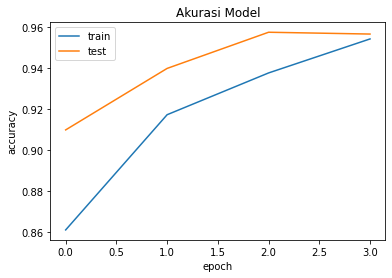

In [10]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

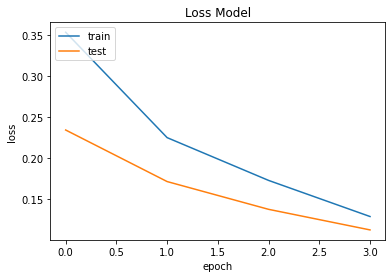

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()